Data pre-processing on the image dataset that we have collected. We will convert them into numpy array format so that it can used for trainning a model.

In [ ]:
drive_path = "/content/drive/MyDrive/ML Project"
collection_path = drive_path + "/Collection"
dataset_path = drive_path + "/Dataset"

my_dataset_covid = dataset_path + "/COVID"
my_dataset_normal = dataset_path + "/NORMAL"

my_test_dataset_normal = dataset_path + "/NORMAL TEST"
my_test_dataset_covid = dataset_path + "/COVID TEST"

In [ ]:
import os
import shutil
from random import shuffle
import cv2
import numpy as np
from tqdm import tqdm
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

%matplotlib inline

np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)

In [ ]:
training_file_path = os.path.join(drive_path,'Data Files/training_data.npy')
training_full_file_path = os.path.join(drive_path,'Data Files/training_full_data.npy')

testing_file_path = os.path.join(drive_path,'Data Files/testing_128_data.npy')

In [ ]:
""" Global parameters """
IMG_SIZE = 128

training_data = []
testing_data = []

Creating the training data file

In [ ]:
print(len(os.listdir(my_dataset_covid)))
print(len(os.listdir(my_dataset_normal)))

600
1397


In [ ]:
  for img in tqdm(os.listdir(my_dataset_covid), total = len(os.listdir(my_dataset_covid)) ):
  label = [0, 1] # [normal,covid positive]
  path = os.path.join(my_dataset_covid,img)
  img = cv2.resize(cv2.imread(path, 0),(IMG_SIZE,IMG_SIZE),interpolation=cv2.INTER_AREA)
  training_data.append([np.array(img),np.array(label)])

shuffle(training_data)


100%|██████████| 600/600 [08:16<00:00,  1.21it/s]


In [ ]:
normal_dataset = os.listdir(my_dataset_normal)

In [ ]:
shuffle(normal_dataset)

for img in tqdm(normal_dataset, total=len(normal_dataset)):
  label = [1, 0] # [normal,covid positive]
  path = os.path.join(my_dataset_normal,img)
  try:
    img = cv2.resize(cv2.imread(path, 0),(IMG_SIZE,IMG_SIZE),interpolation=cv2.INTER_AREA)
  except err:
    print(str(err))
  training_data.append([np.array(img),np.array(label)])



100%|██████████| 1397/1397 [17:00<00:00,  1.37it/s]


In [ ]:
print(f"Training samples count: {len(training_data)}")
shuffle(training_data)
np.save(training_full_file_path,training_data)

Training samples count: 1997


In [ ]:
print(f"Shape of training image: {training_data[0][0].shape}")

Shape of training image: (256, 256)


Creating the testing data file

In [ ]:
dir = my_test_dataset_covid
for img in tqdm(os.listdir(dir), total = len(os.listdir(dir)) ):
  
  label = [0, 1] # [normal,covid positive]
  path = os.path.join(dir,img)
  
  try:
    img = cv2.resize(cv2.imread(path, 0),(IMG_SIZE,IMG_SIZE),interpolation=cv2.INTER_AREA)
  except err:
    print(str(err))

  testing_data.append([np.array(img),np.array(label)])

shuffle(testing_data)

100%|██████████| 62/62 [00:01<00:00, 53.56it/s]


In [ ]:
dir = my_test_dataset_normal

for img in tqdm( os.listdir(dir), total=len(os.listdir(dir))):
  
  label = [1, 0] # [normal,covid positive]
  path = os.path.join(dir,img)
  
  try:
    img = cv2.resize(cv2.imread(path, 0),(IMG_SIZE,IMG_SIZE),interpolation=cv2.INTER_AREA)
  except err:
    print(str(err))

  testing_data.append([np.array(img),np.array(label)])

100%|██████████| 148/148 [00:00<00:00, 211.61it/s]


In [ ]:
shuffle(testing_data)
print(f"Training samples count: {len(testing_data)}")
np.save(testing_file_path,testing_data)

Training samples count: 210


In [ ]:
print(f"Shape of testing image: {testing_data[0][0].shape}")

Shape of testing image: (256, 256)


Checking the file by reading them 

In [ ]:
training_data = []
training_data = np.load(training_file_path,allow_pickle=True)
testing_data = []
testing_data = np.load(testing_file_path,allow_pickle=True)
print(f"Training samples count: {len(training_data)}")
print(f"Testing samples count: {len(testing_data)}")

Training samples count: 1500
Testing samples count: 210


In [ ]:
train_normal, train_covid = np.sum(training_data[:,1],axis=0)
test_normal, test_covid = np.sum(testing_data[:,1],axis=0)

In [ ]:
total = train_normal + train_covid
total += test_normal + test_covid

print(f"No. of Training Covid samples: {train_covid}")
print(f"No. of Training Normal samples: {train_normal}")
print(f"No. of Testing Covid samples: {test_covid}")
print(f"No. of Testing Normal samples: {test_normal}")
print(f"Total count of samples: {total}")

No. of Training Covid samples: 600
No. of Training Normal samples: 900
No. of Testing Covid samples: 62
No. of Testing Normal samples: 148
Total count of samples: 1710


Visually seeing the dataset by random showing some samples

In [ ]:
class_names=['Normal','COVID-19']
def show_random_examples(data_set):
  
  shuffle(data_set) 
  data = data_set
  data=data[1000:1010] 

  col=['green','red']  
  plt.figure(figsize=(10,10))
  
  for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(data[i][0],cmap='gray', vmin=0, vmax=255)
    plt.xticks([])
    plt.yticks([])
    
    plt.xlabel(class_names[np.argmax(data[i][1])], color=col[np.argmax(data[i][1])])

  plt.show()


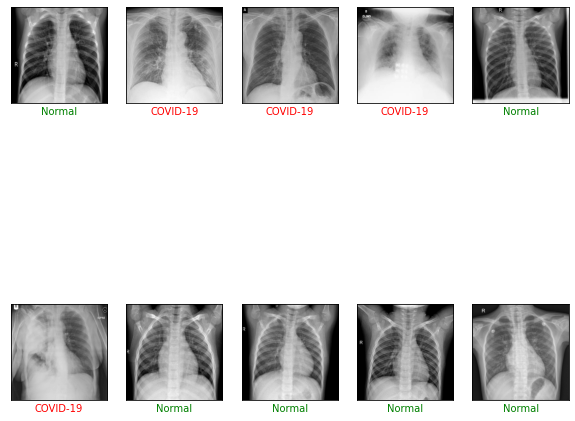

In [ ]:
show_random_examples(training_data)

# Further Preprocessing Steps

In [ ]:
def remove_text(img,demo):
    '''
    Attempts to remove bright textual artifacts from X-ray images. For example, many images indicate the right side of
    the body with a white 'R'. Works only for very bright text.
    :param img: Numpy array of image
    :return: Array of image with (ideally) any characters removed and inpainted
    '''
    mask = cv2.threshold(img, 230, 255, cv2.THRESH_BINARY)[1][:,:].astype(np.uint8)
    img = img.astype(np.uint8)
    result = cv2.inpaint(img, mask, 15, cv2.INPAINT_NS).astype(np.float32)

    if demo == 1:
      
      fig = plt.figure(figsize=(10,10))    
    
      plt.subplot(2, 3, 1)
      plt.imshow(img, cmap='gray')
      plt.title("Original CXR")

      plt.subplot(2, 3, 2)
      plt.imshow(mask,cmap='gray')
      plt.title("Mask")

      plt.subplot(2, 3, 3)
      plt.imshow(result,cmap='gray')
      plt.title("Inpainted CXR")

    return result

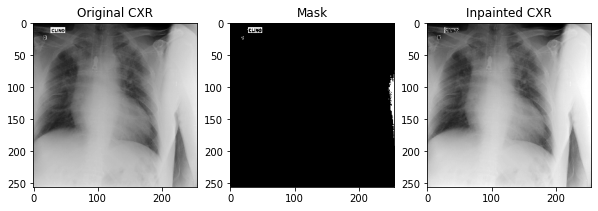

In [ ]:
image = training_data[100][0]
image = remove_text(image,1)

In [ ]:
def clahe_enhancer(test_img, demo):

  test_img = test_img*255
  test_img = np.uint8(test_img)
  test_img_flattened = test_img.flatten()
  
  clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
  clahe_image = clahe.apply(test_img)
  clahe_image_flattened = clahe_image.flatten()

  if demo == 1:

    fig = plt.figure(figsize=(10,10))    
    
    plt.subplot(2, 2, 1)
    plt.imshow(test_img, cmap='gray')
    plt.title("Original CXR")

    plt.subplot(2, 2, 2)
    plt.hist(test_img_flattened)
    plt.title("Histogram of Original CXR")

    plt.subplot(2, 2, 3)
    plt.imshow(clahe_image, cmap='gray')
    plt.title("CLAHE Enhanced CXR")

    plt.subplot(2, 2, 4)
    plt.hist(clahe_image_flattened)
    plt.title("Histogram of CLAHE Enhanced CXR")

  return(clahe_image)

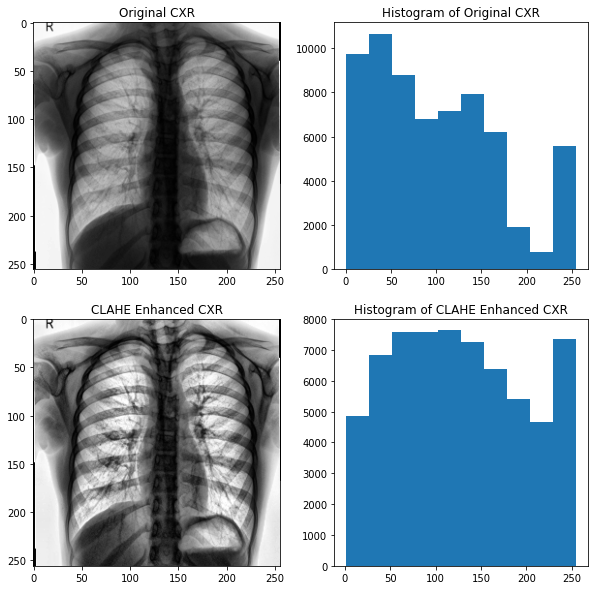

In [ ]:
image = training_data[1][0]
clache_img = clahe_enhancer(image,1)

In [ ]:
%%shell
jupyter nbconvert --to html '/content/drive/MyDrive/ML Project/Preprocessing.ipynb'

[NbConvertApp] Converting notebook /content/drive/MyDrive/ML Project/Preprocessing.ipynb to html
[NbConvertApp] Writing 724513 bytes to /content/drive/MyDrive/ML Project/Preprocessing.html
